In [1]:
import numpy as np
import numpy.random as npr

In [2]:
path = '../../../Downloads/abl_snapshot/abl_snapshot/*.h5'

In [3]:
from glob import glob
fnames = glob(path)[:-1]
fnames

['../../../Downloads/abl_snapshot/abl_snapshot/run0-clone0.h5',
 '../../../Downloads/abl_snapshot/abl_snapshot/run0-clone1.h5',
 '../../../Downloads/abl_snapshot/abl_snapshot/run0-clone10.h5',
 '../../../Downloads/abl_snapshot/abl_snapshot/run0-clone11.h5',
 '../../../Downloads/abl_snapshot/abl_snapshot/run0-clone12.h5',
 '../../../Downloads/abl_snapshot/abl_snapshot/run0-clone13.h5',
 '../../../Downloads/abl_snapshot/abl_snapshot/run0-clone14.h5',
 '../../../Downloads/abl_snapshot/abl_snapshot/run0-clone15.h5',
 '../../../Downloads/abl_snapshot/abl_snapshot/run0-clone16.h5',
 '../../../Downloads/abl_snapshot/abl_snapshot/run0-clone17.h5',
 '../../../Downloads/abl_snapshot/abl_snapshot/run0-clone18.h5',
 '../../../Downloads/abl_snapshot/abl_snapshot/run0-clone19.h5',
 '../../../Downloads/abl_snapshot/abl_snapshot/run0-clone2.h5',
 '../../../Downloads/abl_snapshot/abl_snapshot/run0-clone3.h5',
 '../../../Downloads/abl_snapshot/abl_snapshot/run0-clone4.h5',
 '../../../Downloads/abl_snaps

In [4]:
import mdtraj as md
trajs = [md.load(fname) for fname in fnames]
traj = trajs[0]

In [5]:
trajs

[<mdtraj.Trajectory with 2600 frames, 4062 atoms, 252 residues, and unitcells at 0x114d92650>,
 <mdtraj.Trajectory with 2440 frames, 4062 atoms, 252 residues, and unitcells at 0x11ccb9e90>,
 <mdtraj.Trajectory with 5997 frames, 4062 atoms, 252 residues, and unitcells at 0x11cea5710>,
 <mdtraj.Trajectory with 4119 frames, 4062 atoms, 252 residues, and unitcells at 0x12558cd10>,
 <mdtraj.Trajectory with 6036 frames, 4062 atoms, 252 residues, and unitcells at 0x125776650>,
 <mdtraj.Trajectory with 8198 frames, 4062 atoms, 252 residues, and unitcells at 0x12d2c9e90>,
 <mdtraj.Trajectory with 5760 frames, 4062 atoms, 252 residues, and unitcells at 0x12d7c8710>,
 <mdtraj.Trajectory with 6720 frames, 4062 atoms, 252 residues, and unitcells at 0x12e1ade90>,
 <mdtraj.Trajectory with 7717 frames, 4062 atoms, 252 residues, and unitcells at 0x12e39a7d0>,
 <mdtraj.Trajectory with 3760 frames, 4062 atoms, 252 residues, and unitcells at 0x12e57ffd0>,
 <mdtraj.Trajectory with 8395 frames, 4062 atoms, 

In [10]:
n_atoms = traj.n_atoms
n_atoms

4062

In [6]:
import pyemma
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
from msmbuilder.featurizer import DihedralFeaturizer
dih = DihedralFeaturizer(['phi', 'psi', 'omega', 'chi1', 'chi2', 'chi3', 'chi4'])
X_dih = dih.fit_transform(trajs)

In [76]:
X_dih[0].shape[1] / 2,X_dih[0].shape[1]

(1239, 2478)

In [45]:
from msmbuilder.featurizer import AlphaAngleFeaturizer
aaf = AlphaAngleFeaturizer()
X_aaf = aaf.fit_transform(trajs)

In [46]:
X_aaf[0].shape

(2600, 498)

In [47]:
from msmbuilder.featurizer import AtomPairsFeaturizer

all_pairs = []
for i in range(n_atoms):
    for j in range(i):
        all_pairs.append((i,j))
print(len(all_pairs))

8247891


In [48]:
all_pairs[:10]

[(1, 0),
 (2, 0),
 (2, 1),
 (3, 0),
 (3, 1),
 (3, 2),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3)]

In [49]:
npr.seed(0)
npr.shuffle(all_pairs)

In [50]:
all_pairs[:10]

[(2953, 2694),
 (3853, 1418),
 (3497, 1081),
 (1095, 1036),
 (2690, 640),
 (3925, 3286),
 (1864, 615),
 (3540, 1555),
 (2215, 515),
 (1722, 1431)]

In [61]:
some_pairs = all_pairs[:3000]

In [62]:
apf = AtomPairsFeaturizer(some_pairs)
X_apf = apf.fit_transform(trajs)

In [53]:
import pyemma
tica = pyemma.coordinates.tica(X_aaf)
X_tica = tica.get_output()

getting output of TICA: 100% (30/30) [#############################] eta 00:01 -

In [63]:
tica_p = pyemma.coordinates.tica(X_apf)
X_tica_p = tica.get_output()

getting output of TICA: 100% (30/30) [#############################] eta 00:01 /

In [71]:
tica_dih = pyemma.coordinates.tica(X_dih)
X_tica_dih = tica.get_output()

getting output of TICA: 100% (30/30) [#############################] eta 00:00 \

In [64]:
Xs = [X_apf,X_aaf]
X_feat = [np.hstack([x[i] for x in Xs]) for i in range(len(trajs))]
tica_tot = pyemma.coordinates.tica(X_feat)

calculate covariances: 100% (30/30) [##############################] eta 00:01 /

In [ ]:
# also throw in dihedrals?

In [56]:
X_tot = tica_tot.get_output()

getting output of TICA: 100% (30/30) [#############################] eta 00:01 -

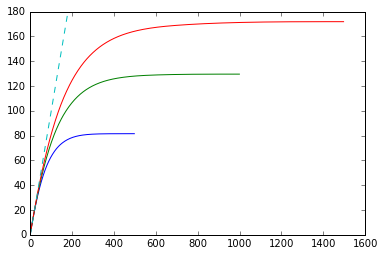

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.cumsum(tica.eigenvalues**2))
plt.plot(np.cumsum(tica_p.eigenvalues**2))
plt.plot(np.cumsum(tica_tot.eigenvalues**2))
plt.plot(range(180),range(180),'--')
#plt.ylim(0,180)
#plt.xlim(0,500)

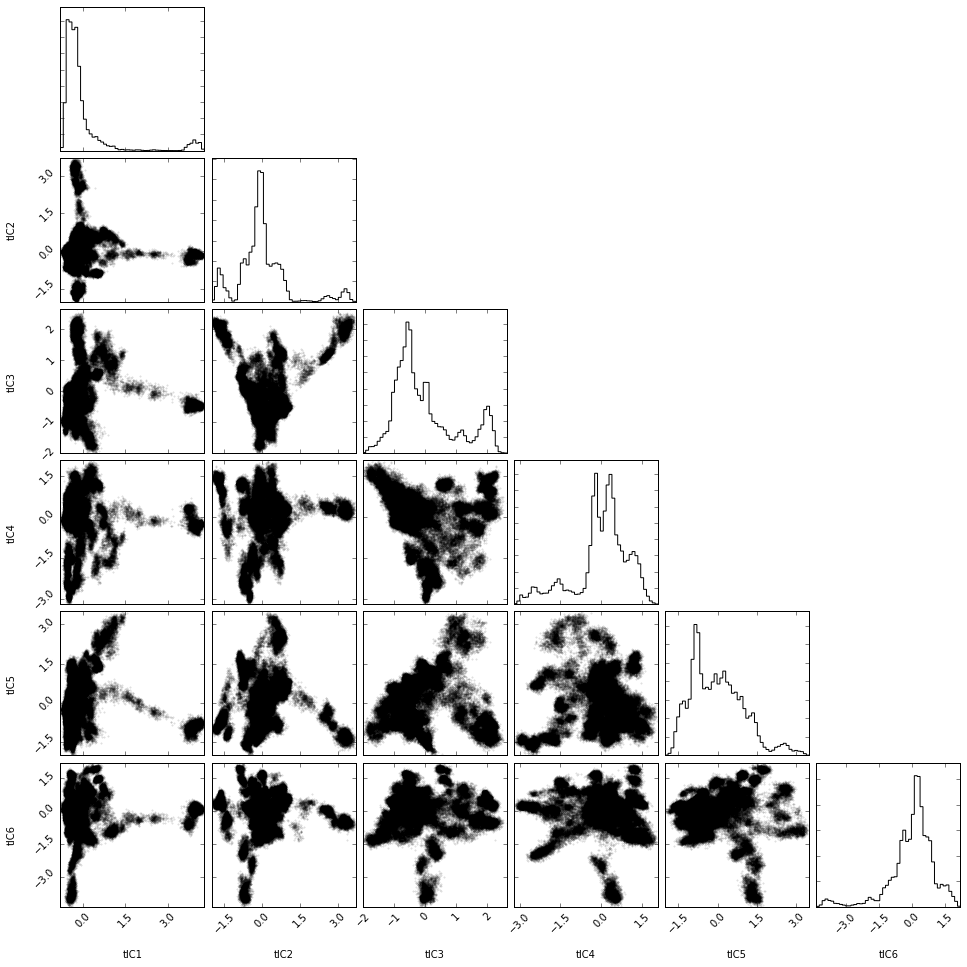

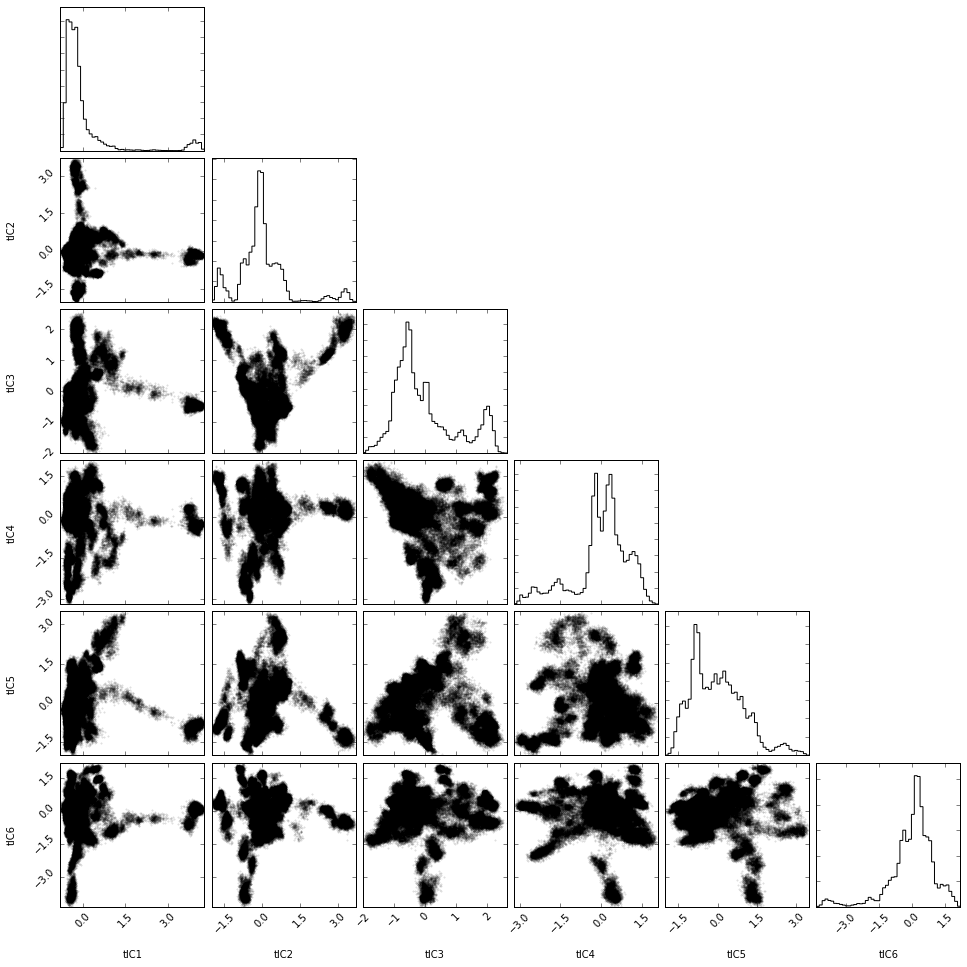

In [79]:
from triangle import corner
n_tics = 6
corner(np.vstack(X_tot)[:,:n_tics],
           plot_contours=False,
           labels=['tIC{0}'.format(i+1) for i in range(n_tics)]
          )

In [62]:
tica_tot.dimension()

480

In [68]:
kmeans = pyemma.coordinates.cluster_mini_batch_kmeans(X_tot,k=100,max_iter=100)

kmeans iterations: 100% (100/100) [################################] eta 00:01 \07-05-16 23:48:35 pyemma.coordinates.clustering.kmeans.MiniBatchKmeansClustering[5] INFO     Algorithm did not reach convergence criterion of 1e-05 in 100 iterations. Consider increasing max_iter.
kmeans iterations: 100% (100/100) [################################] eta 00:00 /

In [69]:
dtrajs = [dtraj.flatten() for dtraj in kmeans.get_output()]

getting output of MiniBatchKmeansClustering: 100% (30/30) [########] eta 00:01 \

estimating MaximumLikelihoodMSM: 100% (100/100) [##################] eta 00:01 |

/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/msmtools/estimation/api.py:941: NotConvergedWarning: Reversible transition matrix estimation didn't converge.
  T = sparse.mle_trev.mle_trev(C, **kwargs)


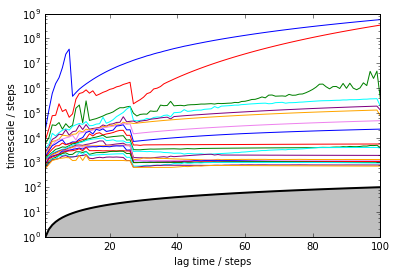

In [70]:
nits = 20
its = pyemma.msm.its(dtrajs,lags=range(1,101),nits=nits)
pyemma.plots.plot_implied_timescales(its)

In [9]:
from math import factorial
factorial(n_atoms) / (factorial(n_atoms - 3) * factorial(3))
# The full Grassmann vector has 11 billion entries!

11162145820L

In [10]:
n_residues = 252
factorial(n_residues) / (factorial(n_residues - 3) * factorial(3))
# The Grassmann vector using only alpha-carbons has >2.5 million entries

2635500L

In [33]:
def select_random_features(n_atoms,n_features=1000,seed=0):
    npr.seed(0)
    all_indices = np.arange(n_atoms)
    
    feature_indices = []
    for i in range(n_features):
        npr.shuffle(all_indices)
        feature_ind = np.zeros(n_atoms,dtype=bool)
        feature_ind[all_indices[:3]] = True
        feature_indices.append(feature_ind)
    return feature_indices

def grassmann_vector(X,indices):
    return np.array([np.linalg.det(X[s]) for s in indices])

def grassmann_featurize(trajs,indices):
    return [np.array([grassmann_vector(x,indices) for x in traj.xyz]) for traj in trajs]

def parallel_grassmann_featurize(trajs,indices,n_jobs=8):
    from joblib import Parallel,delayed
    def f(traj):
        return np.array([grassmann_vector(x,indices) for x in traj.xyz])
    return Parallel(n_jobs=n_jobs,backend='threading')(delayed(f)(traj) for traj in trajs)

In [36]:
feature_indices = select_random_features(n_atoms,n_features=3000)

In [37]:
%%time
X_g = grassmann_featurize(trajs,feature_indices)

CPU times: user 1h 55min 59s, sys: 3.54 s, total: 1h 56min 2s
Wall time: 1h 56min 2s


In [42]:
np.save('X_grassmann_abl_run_0.npy',X_g)

In [35]:
X_g_ = parallel_grassmann_featurize(trajs,feature_indices)

TypeError: can't pickle function objects

getting output of TICA: 100% (30/30) [#############################] eta 00:01 /

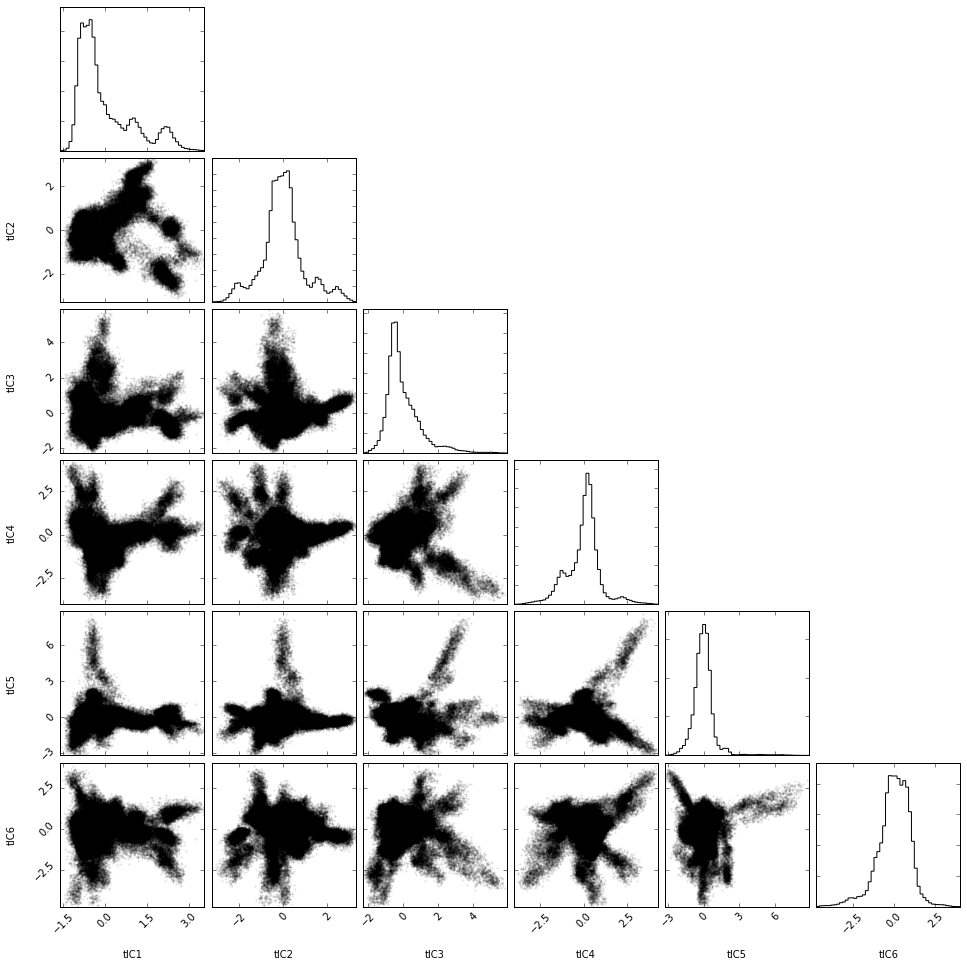

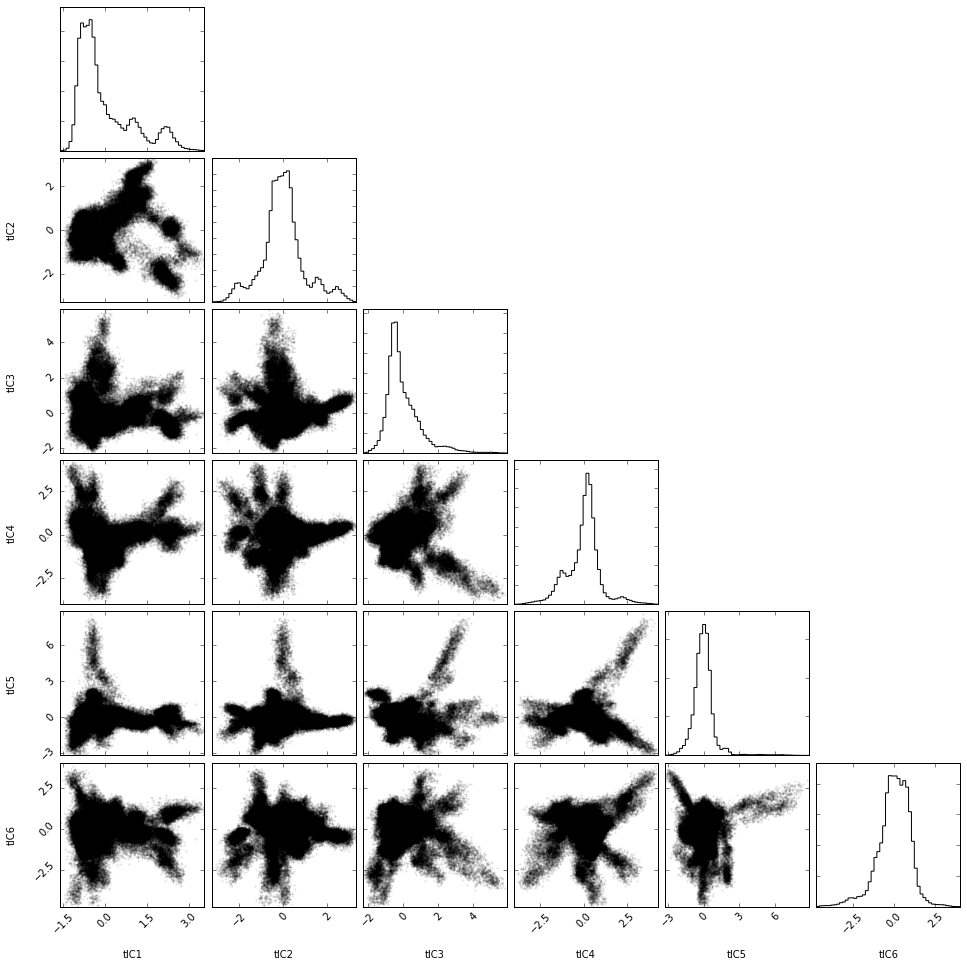

In [38]:
tica_g = pyemma.coordinates.tica(X_g)
X_tica_g = tica_g.get_output()

n_tics = 6
from triangle import corner
corner(np.vstack(X_tica_g)[:,:n_tics],
           plot_contours=False,
           labels=['tIC{0}'.format(i+1) for i in range(n_tics)]
          )

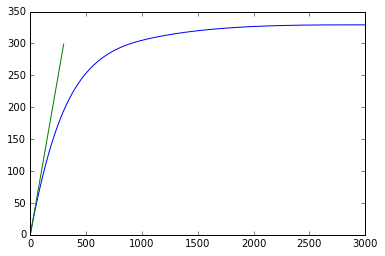

In [43]:
plt.plot(np.cumsum(tica_g.eigenvalues**2),label='Grassmann')
plt.plot(range(300),range(300))

(2600, 3000)

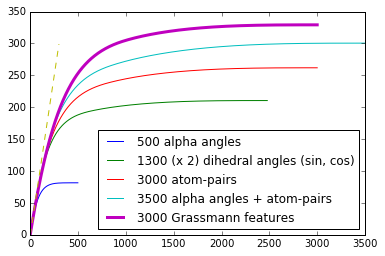

In [77]:
plt.plot(np.cumsum(tica.eigenvalues**2),label = '500 alpha angles')
plt.plot(np.cumsum(tica_dih.eigenvalues**2), label = '1300 (x 2) dihedral angles (sin, cos)')
plt.plot(np.cumsum(tica_p.eigenvalues**2),label = '3000 atom-pairs')
plt.plot(np.cumsum(tica_tot.eigenvalues**2), label = '3500 alpha angles + atom-pairs')
plt.plot(np.cumsum(tica_g.eigenvalues**2), linewidth = 3, label = '3000 Grassmann features')
plt.plot(range(300),range(300),'--')
plt.legend(loc='best')

In [82]:
X_apf_g = [np.hstack([x[i] for x in [X_g,X_apf]]) for i in range(len(trajs))]

In [83]:
tica_apf_g = pyemma.coordinates.tica(X_apf_g)

calculate covariances: 100% (30/30) [##############################] eta 00:02 \

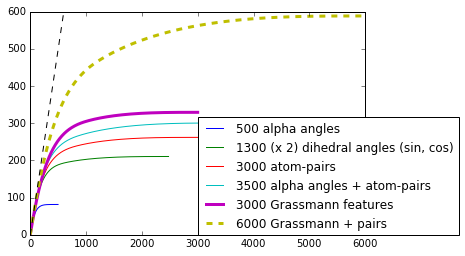

In [89]:
plt.plot(np.cumsum(tica.eigenvalues**2),label = '500 alpha angles')
plt.plot(np.cumsum(tica_dih.eigenvalues**2), label = '1300 (x 2) dihedral angles (sin, cos)')
plt.plot(np.cumsum(tica_p.eigenvalues**2),label = '3000 atom-pairs')
plt.plot(np.cumsum(tica_tot.eigenvalues**2), label = '3500 alpha angles + atom-pairs')
plt.plot(np.cumsum(tica_g.eigenvalues**2), linewidth = 3, label = '3000 Grassmann features')
plt.plot(np.cumsum(tica_apf_g.eigenvalues**2), '--', linewidth = 3, label = '6000 Grassmann + pairs')
plt.plot(range(600),range(600),'--')
plt.legend(loc=(0.5,0))

In [90]:
X_tica_apf_g = tica_apf_g.get_output()

getting output of TICA: 100% (30/30) [#############################] eta 00:01 /

In [92]:
del(X_apf_g)
del(Xs)

In [ ]:
# next-- draw a few samples of size 1000 or 3000

kmeans iterations: 100% (100/100) [################################] eta 00:01 /08-05-16 09:24:27 pyemma.coordinates.clustering.kmeans.MiniBatchKmeansClustering[8] INFO     Algorithm did not reach convergence criterion of 1e-05 in 100 iterations. Consider increasing max_iter.
estimating MaximumLikelihoodMSM: 100% (190/190) [##################] eta 00:01 |

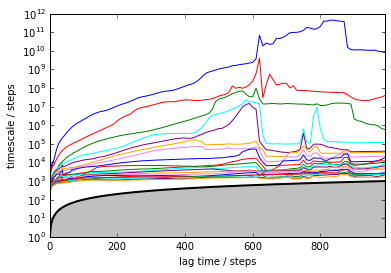

In [44]:
nits = 20
k = 100

kmeans = pyemma.coordinates.cluster_mini_batch_kmeans(X_tica_g,k=k,max_iter=100)
dtrajs_g = [dtraj.flatten() for dtraj in kmeans.get_output()]

its = pyemma.msm.its(dtrajs_g,lags=range(1,101)+range(100,1000)[::10],nits=nits)
pyemma.plots.plot_implied_timescales(its)

estimating MaximumLikelihoodMSM: 100% (140/140) [##################] eta 00:00 \

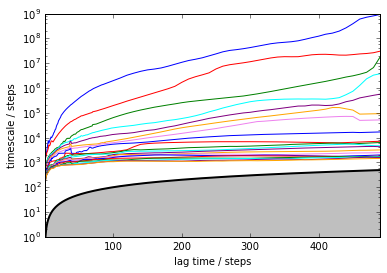

In [59]:
its = pyemma.msm.its(dtrajs_g,lags=range(1,101)+range(100,500)[::10],nits=nits)
pyemma.plots.plot_implied_timescales(its)

In [ ]:
its = pyemma.msm.its(dtrajs_g,lags=range(1,101)+range(100,500)[::10],nits=nits)
pyemma.plots.plot_implied_timescales(its)

kmeans iterations:  13% ( 13/100) [####                            ] eta 33:38 \08-05-16 03:07:28 pyemma.coordinates.clustering.kmeans.MiniBatchKmeansClustering[6] INFO     Cluster centers converged after 14 steps.
estimating MaximumLikelihoodMSM: 100% (100/100) [##################] eta 00:00 /08-05-16 03:09:19 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[7] WARNING  Estimation has failed at lagtimes: [  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26
  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44
  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100]. Run single-lag estimation at these lags to track down the error.


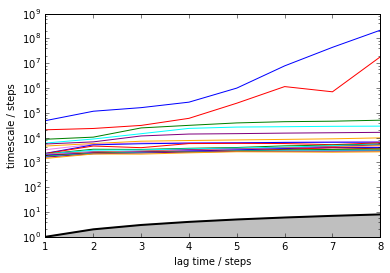

In [41]:
k = 500

kmeans = pyemma.coordinates.cluster_mini_batch_kmeans(X_tica_g,k=k,max_iter=100)
dtrajs_g = [dtraj.flatten() for dtraj in kmeans.get_output()]

its = pyemma.msm.its(dtrajs_g,lags=range(1,101),nits=nits)
pyemma.plots.plot_implied_timescales(its)

In [95]:
X_tica_apf_g[0].shape

(2600, 2878)

kmeans iterations:  16% ( 16/100) [#####                           ] eta 16:07 /08-05-16 10:03:55 pyemma.coordinates.clustering.kmeans.MiniBatchKmeansClustering[16] INFO     Cluster centers converged after 17 steps.
estimating MaximumLikelihoodMSM: 100% (190/190) [##################] eta 00:00 /

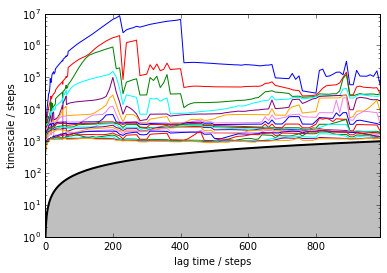

In [96]:
k = 100

kmeans = pyemma.coordinates.cluster_mini_batch_kmeans(X_tica_apf_g,k=k,max_iter=100)
dtrajs_apf_g = [dtraj.flatten() for dtraj in kmeans.get_output()]

its = pyemma.msm.its(dtrajs_apf_g,lags=range(1,101)+range(100,1000)[::10],nits=nits)
pyemma.plots.plot_implied_timescales(its)

estimating MaximumLikelihoodMSM: 100% (140/140) [##################] eta 00:01 -

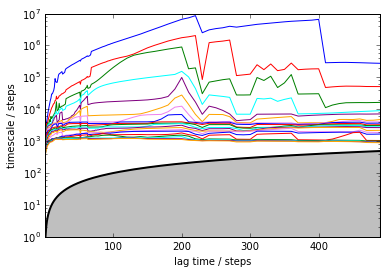

In [97]:
its = pyemma.msm.its(dtrajs_apf_g,lags=range(1,101)+range(100,500)[::10],nits=nits)
pyemma.plots.plot_implied_timescales(its)

In [98]:
n_tics = 6
X_comb = np.vstack(X_tica_apf_g)[:,:n_tics]

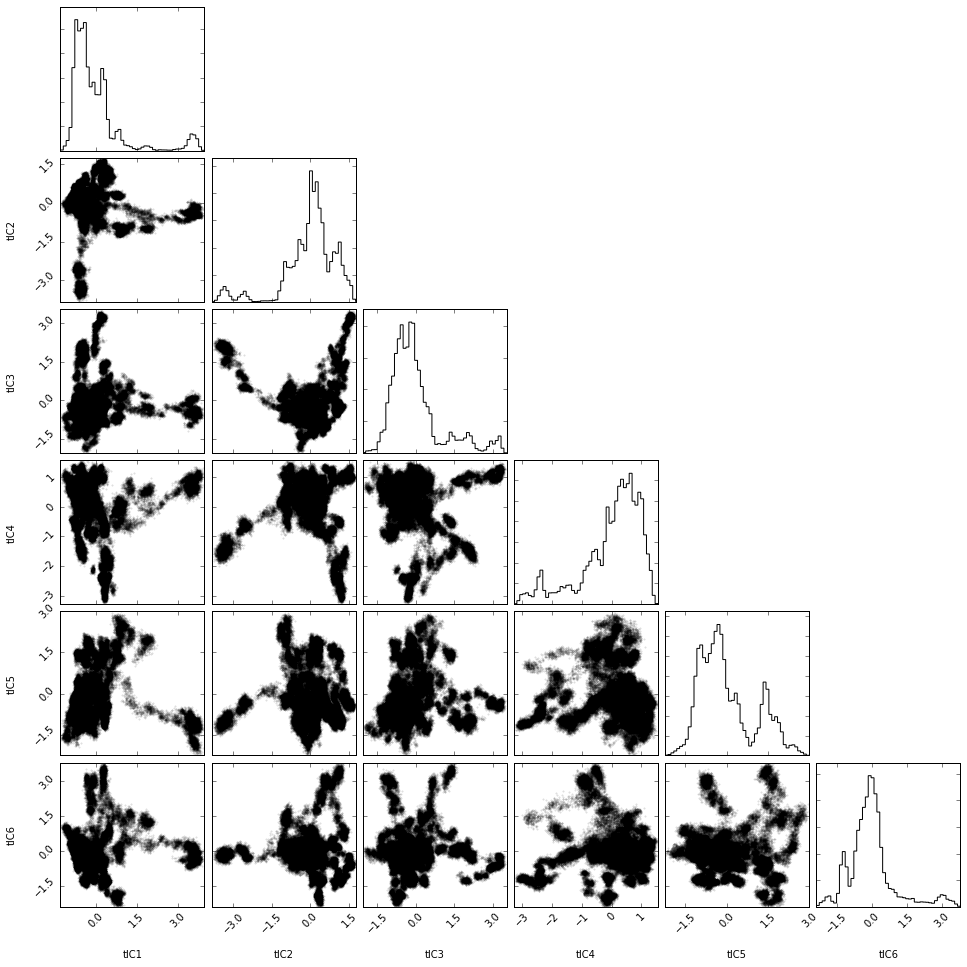

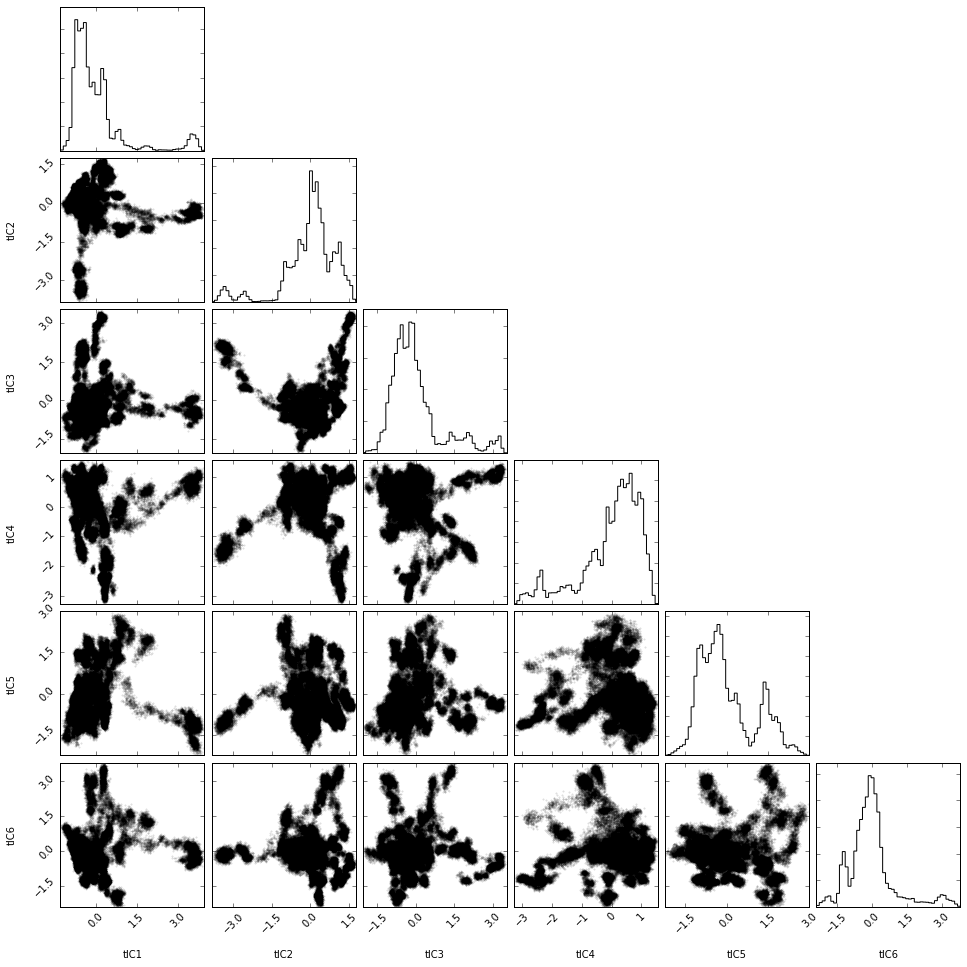

In [99]:
from triangle import corner

corner(X_comb,
           plot_contours=False,
           labels=['tIC{0}'.format(i+1) for i in range(n_tics)]
          )